# Logistic Regresssion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math
import pandas as pd
import random

In [2]:
def zscore_normal(x):
        mu = np.mean(x,axis=0)
        sigma = np.std(x,axis=0)
        x_norm = (x-mu)/sigma

        return (x_norm)
        
def mean_normal(x):
        mu = np.mean(x,axis=0)
        x_norm = (x-mu)/(np.max(x)-np.min(x))
                
        return (x_norm)

def accuracy(y_pred, y_true):
        return np.mean(y_pred==y_true)
        
def plot_cost(Cost_list, iterations):
        t = np.arange(0, iterations)
        plt.plot(t, Cost_list)
        plt.show

In [3]:
class LogisticRegression:
    
    def __init__(self, show_progress=False):
        self.show_progress = show_progress

    def sigmoid(self,x):
        sig = 1/(1+(np.exp(-x)))
        return sig
    
    def cost(self,x,y,w,b,l):
        m = x.shape[0]
        f_wb = self.sigmoid(np.dot(x,w) + b)
        cost = (-np.sum(y * np.log(f_wb) + (1-y) * np.log(1 - f_wb)) / m) + (l / (2 * m)) * np.sum(np.square(w))
        return cost
    
    def grad_fn(self,x,y,w,b,l):
        m = x.shape[0]
        f_wb = self.sigmoid(np.dot(x,w) + b)
        err = f_wb - y
        dj_dw = np.dot(err, x) / m + (l/m) * w
        dj_db = np.sum(err) / m
        return dj_dw, dj_db
    
    def grad_descent(self,x,y,w_in,b_in,l,alpha,iterations):
        print("Fitting the given dataset..")
        self.w = []
        w = copy.deepcopy(w_in)
        b = b_in
        m = len(y)
        J_history = []
        k=0
        for i in np.unique(y): 
            y_onevsall = np.where(y == i, 1, 0)
            costlist = []
            print(f"For {i}:")
            for _ in range(iterations):
                dj_dw,dj_db=self.grad_fn(x,y_onevsall,w,b,l)

                w = w - alpha * dj_dw
                b = b - alpha * dj_db
                cost_for_no = self.cost(x,y_onevsall,w,b,l) 
                costlist.append(cost_for_no)

                if self.show_progress and _% math.ceil(iterations / 10) == 0:
                    print(f"Iteration {_:4d}: Cost {costlist[-1]:8.5f}   ")       
            self.w.append((w, i))
            J_history.append(costlist)
            k += 1
        return self.w, b, J_history
    
    def predict(self, X, w, b):
        X_predicted = [max((self.sigmoid(i.dot(theta) + b), c) for theta, c in w)[1] for i in X ]

        return X_predicted

In [4]:
file_path = 'Classification_train.csv'
df = pd.read_csv(file_path, dtype='float64')

y = df.iloc[:, 0].values
x = df.iloc[:, 1:].values

x_train = x[0:24000]
y_train = y[0:24000].reshape(-1,)

In [5]:
print("Shape of training set input: ", x_train.shape)
print("Shape of training set output: ", y_train.shape)

Shape of training set input:  (24000, 784)
Shape of training set output:  (24000,)


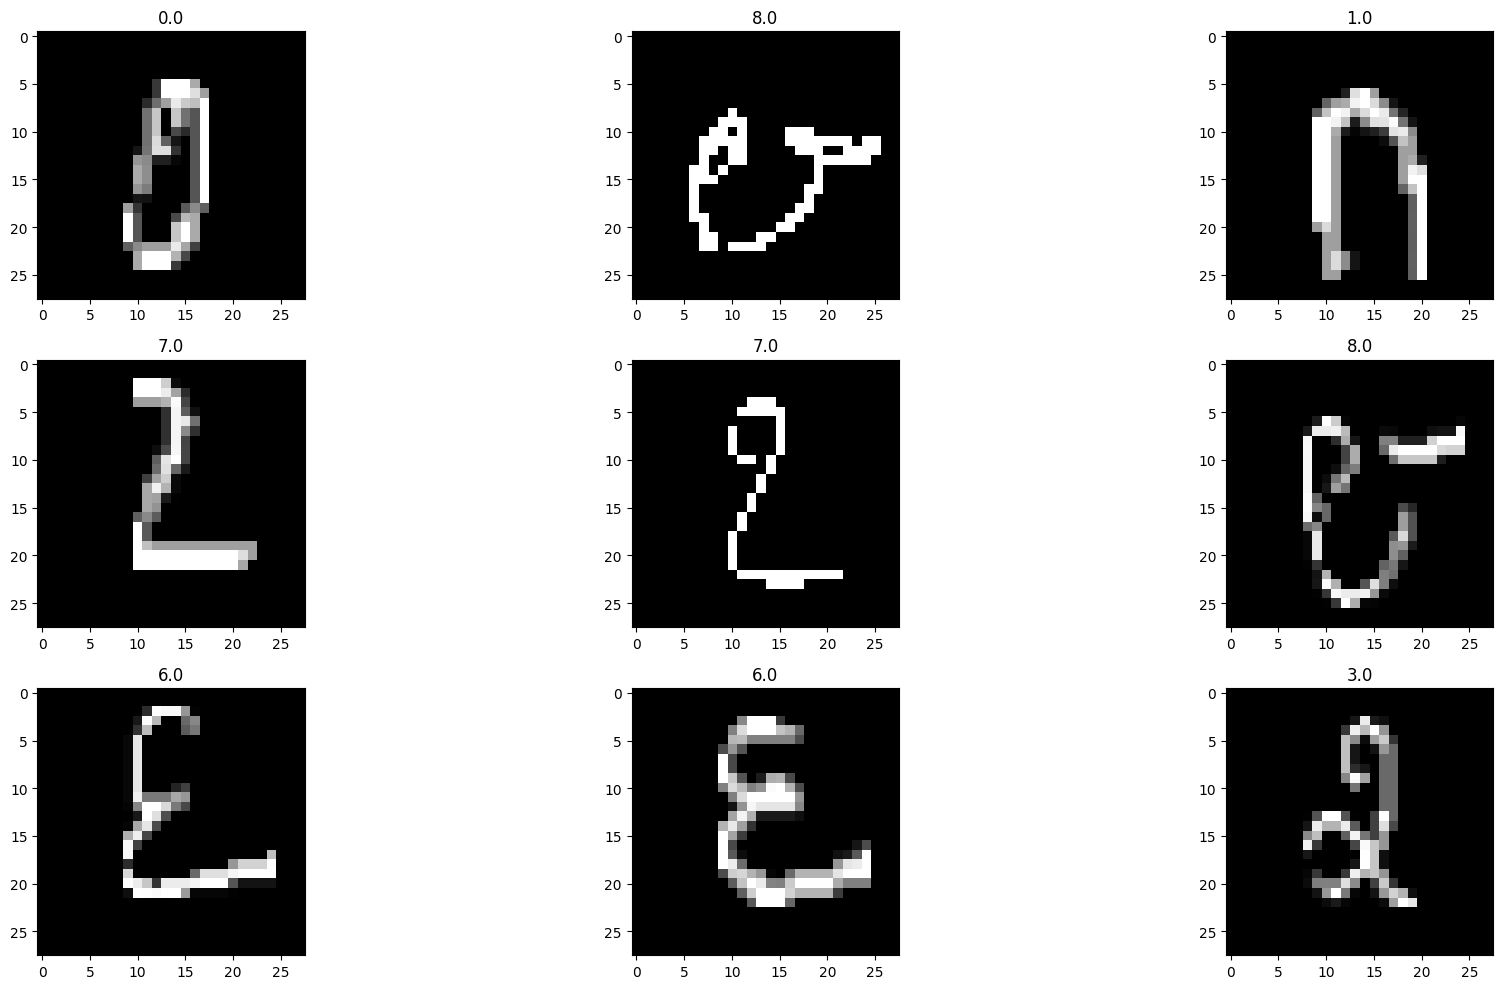

In [6]:
fig, ax = plt.subplots(3,3, figsize =(20,10))
c = 0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(x_train[c].reshape(28,28),cmap='gray')
        ax[i][j].set_title(y[c])
        c += 1
plt.tight_layout()
plt.show()

In [7]:
w=np.zeros(x.shape[1])
b=0

x_train = mean_normal(x_train)
iterations = 1000
alpha = 1.0
l = 10e-12

logistic_model = LogisticRegression(show_progress=True)

w_final, b_final, J_hist = logistic_model.grad_descent(x_train, y_train, w, b, l, alpha, iterations)


Fitting the given dataset..
For 0.0:
Iteration    0: Cost  0.48899   
Iteration  100: Cost  0.06563   
Iteration  200: Cost  0.05195   
Iteration  300: Cost  0.04589   
Iteration  400: Cost  0.04229   
Iteration  500: Cost  0.03985   
Iteration  600: Cost  0.03804   
Iteration  700: Cost  0.03664   
Iteration  800: Cost  0.03551   
Iteration  900: Cost  0.03457   
For 1.0:
Iteration    0: Cost  0.70326   
Iteration  100: Cost  0.04503   
Iteration  200: Cost  0.03324   
Iteration  300: Cost  0.02853   
Iteration  400: Cost  0.02584   
Iteration  500: Cost  0.02404   
Iteration  600: Cost  0.02271   
Iteration  700: Cost  0.02168   
Iteration  800: Cost  0.02084   
Iteration  900: Cost  0.02013   
For 2.0:
Iteration    0: Cost  1.06580   
Iteration  100: Cost  0.02678   
Iteration  200: Cost  0.01812   
Iteration  300: Cost  0.01447   
Iteration  400: Cost  0.01240   
Iteration  500: Cost  0.01104   
Iteration  600: Cost  0.01007   
Iteration  700: Cost  0.00933   
Iteration  800: Cost 

In [8]:
y_pred = logistic_model.predict(x_train, w_final, b_final)

In [9]:
print(f"Accuracy: {accuracy(y_pred, y_train):0.6f}")

Accuracy: 0.961875


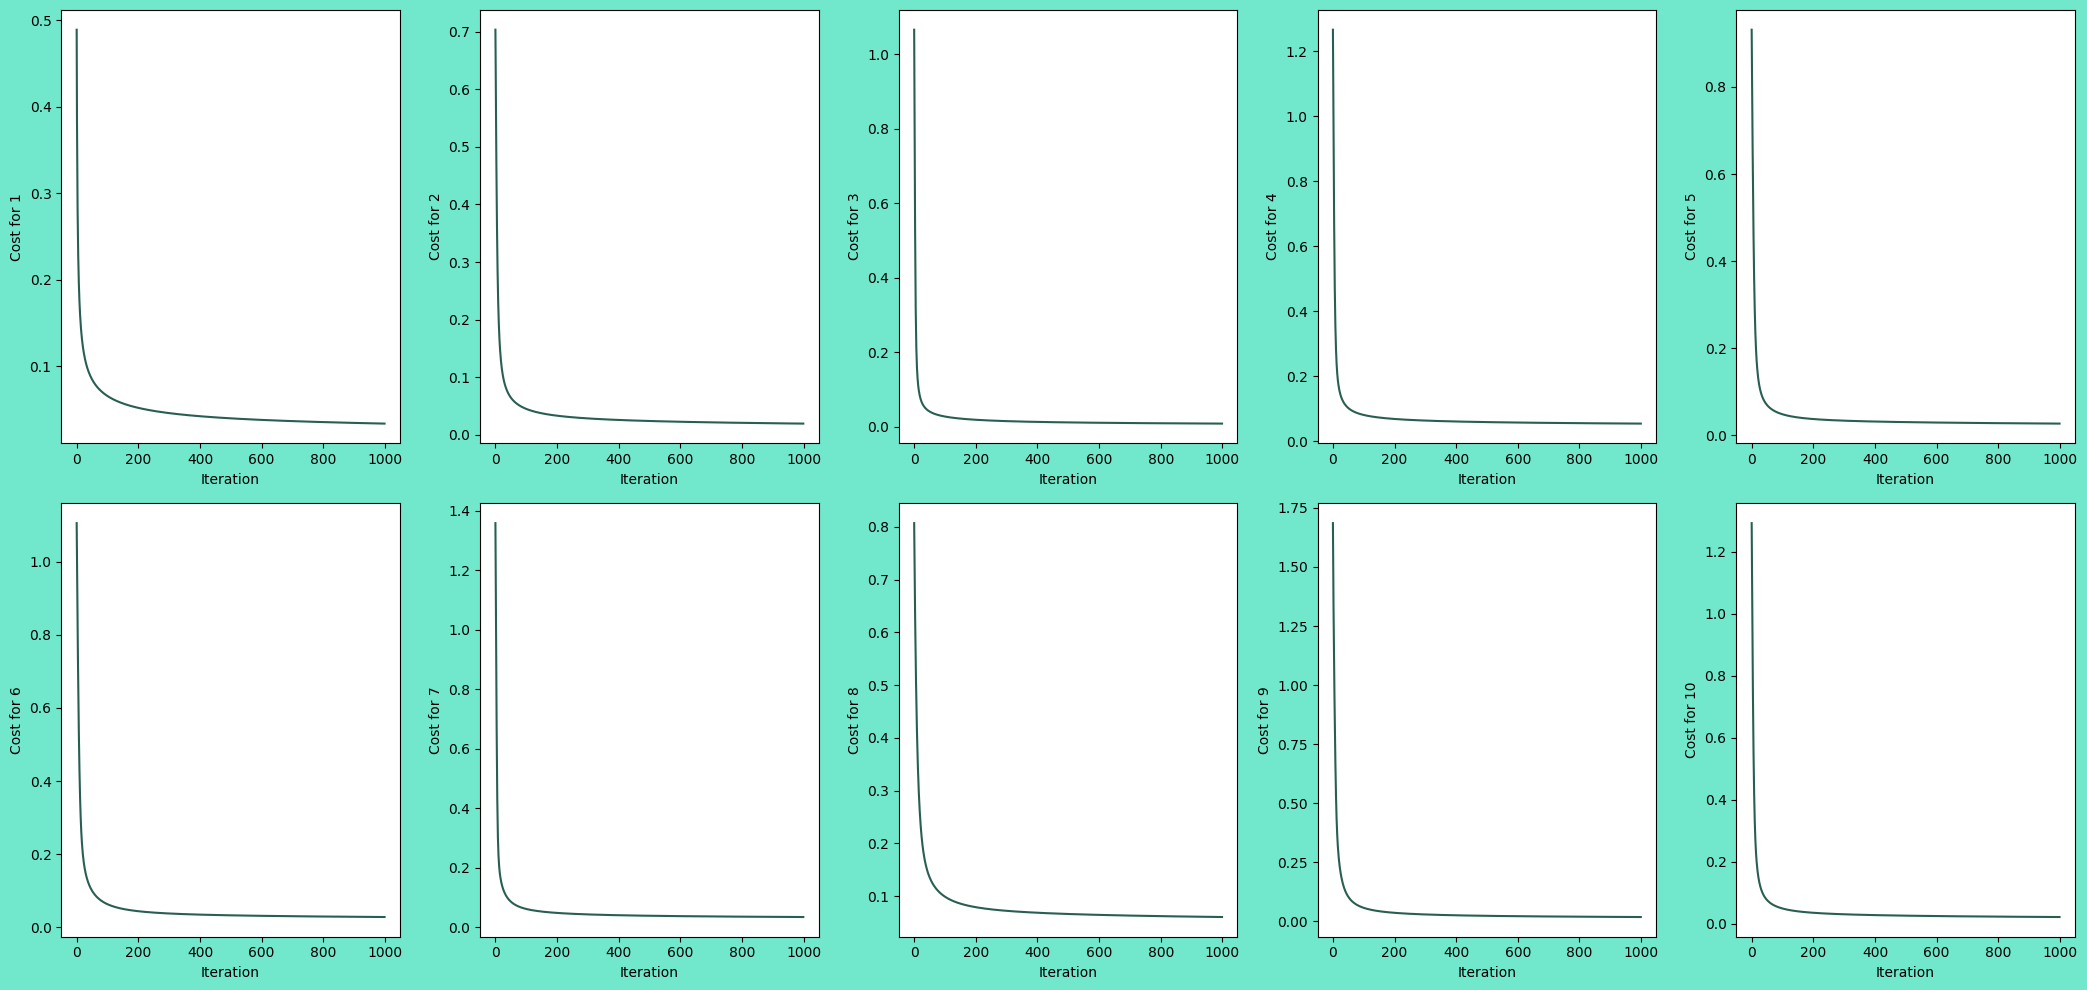

In [10]:
j = 5
fig, axs = plt.subplots(2, j, figsize=(21, 10))
fig.set_facecolor('#71e8cc')

for i in range(0, 10):
    t = np.arange(0, iterations)
    axs[i // j, i % j].plot(t, J_hist[i], c='#285f52')
    axs[i // j, i % j].set_xlabel('Iteration')
    axs[i // j, i % j].set_ylabel('Cost for ' + str(i+1))
    # axs[i // 3, i % 3].legend()

plt.tight_layout()

plt.show()

In [11]:
x_cv=x[24000:]
y_cv=y[24000:]
x_cv = np.array(x_cv,dtype=float)
y_cv = np.array(y_cv,dtype=float)
y_cv = y_cv.transpose()
x_cv = mean_normal(x_cv)

In [12]:
print("Shape of training set input: ", x_cv.shape)
print("Shape of training set output: ", y_cv.shape)

Shape of training set input:  (6000, 784)
Shape of training set output:  (6000,)


In [13]:
y_cv_pred = logistic_model.predict(x_cv, w_final, b_final)

In [14]:
print(f"Accuracy for cross-validation set: {accuracy(y_cv_pred, y_cv)}")

Accuracy for cross-validation set: 0.9571666666666667


In [15]:
print(f"W found by logistic regression: {w_final}")

W found by logistic regression: [(array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.89602599e-05,  3.23823312e-04,
        5.28688661e-04,  9.80060398e-04,  1.60743180e-03,  2.25749798e-03,
        1.76259877e-03,  1.07250706e-03, -4.14295814e-04, -1.88716080e-03,
       -3.55112254e-04, -1.58417693e-04,  1.39803814e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -8.12362421e-05,  5.90274346e-04,
        3.04738152e-04,  3.77675532e-04,  1.59437028e-03,  1.40942376e-02,
        2.46016811e-02,  2.82171775e-02,  1.92838014e-02,  9.28899616e-03,
        2.95166120e-03,  3.19872628e-03,  8.97749598e-04,  5.60872320e-04,
        5.02712635e-04,  8.47571992e-05,  0.00000000e+00,  0.00000

In [16]:
print(f"B found by logistic regression: {b_final}")

B found by logistic regression: -8.059997222082838


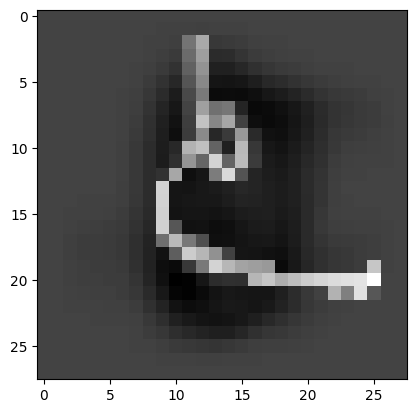

Model says it is:  6.0


In [17]:
idx = int(random.randrange(0,x_cv.shape[1]))
plt.imshow(x_cv.T[:,idx].reshape((28,28)), cmap='gray')
plt.show()
pred = y_cv[idx]
print("Model says it is: ", pred)

In [18]:
file_path = 'Classification_test.csv'
df = pd.read_csv(file_path, dtype='float64')

test_id = df.iloc[:, 0].values
x_test = df.iloc[:, 1:].values

x_test = np.array(x_test, dtype=float)
x_test = mean_normal(x_test)

In [19]:
print("Shape of test set input: ", x_test.shape)

Shape of test set input:  (10000, 784)


In [20]:
y_test = logistic_model.predict(x_test, w_final, b_final)

In [21]:
print(y_test)

[0.0, 4.0, 5.0, 5.0, 7.0, 1.0, 1.0, 4.0, 1.0, 3.0, 6.0, 1.0, 8.0, 4.0, 5.0, 9.0, 4.0, 2.0, 3.0, 1.0, 4.0, 7.0, 2.0, 9.0, 5.0, 4.0, 2.0, 7.0, 3.0, 9.0, 3.0, 6.0, 9.0, 6.0, 6.0, 6.0, 1.0, 7.0, 1.0, 2.0, 5.0, 9.0, 2.0, 2.0, 0.0, 3.0, 2.0, 0.0, 7.0, 1.0, 7.0, 0.0, 7.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 3.0, 5.0, 4.0, 7.0, 6.0, 9.0, 4.0, 8.0, 8.0, 8.0, 8.0, 7.0, 1.0, 3.0, 2.0, 2.0, 3.0, 1.0, 1.0, 7.0, 2.0, 3.0, 4.0, 5.0, 3.0, 3.0, 7.0, 3.0, 0.0, 3.0, 5.0, 2.0, 3.0, 4.0, 0.0, 3.0, 3.0, 9.0, 5.0, 1.0, 8.0, 5.0, 4.0, 8.0, 5.0, 8.0, 8.0, 9.0, 5.0, 8.0, 2.0, 1.0, 0.0, 6.0, 3.0, 7.0, 8.0, 3.0, 6.0, 7.0, 7.0, 2.0, 6.0, 0.0, 1.0, 5.0, 7.0, 3.0, 0.0, 2.0, 5.0, 5.0, 1.0, 0.0, 8.0, 0.0, 1.0, 3.0, 1.0, 3.0, 3.0, 2.0, 7.0, 3.0, 0.0, 1.0, 9.0, 3.0, 6.0, 0.0, 3.0, 1.0, 5.0, 7.0, 6.0, 8.0, 2.0, 3.0, 3.0, 9.0, 9.0, 3.0, 9.0, 1.0, 6.0, 2.0, 0.0, 2.0, 3.0, 9.0, 1.0, 2.0, 4.0, 5.0, 7.0, 3.0, 5.0, 9.0, 8.0, 5.0, 6.0, 1.0, 2.0, 3.0, 2.0, 5.0, 8.0, 3.0, 6.0, 3.0, 5.0, 6.0, 9.0, 1.0, 6.0, 5.0, 0.0, 3.0, 6.0, 1.0, 7.0,

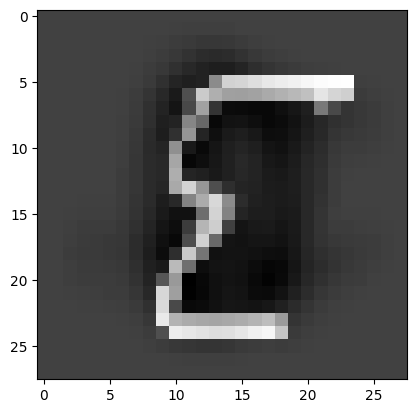

Model says it is:  9.0


In [22]:
idx = int(random.randrange(0,x_test.shape[1]))
plt.imshow(x_test.T[:,idx].reshape((28,28)), cmap='gray')
plt.show()
pred = y_test[idx]
print("Model says it is: ", pred)

In [23]:
output = np.array((test_id, y_test))
print(output)

[[1.5795e+04 8.6000e+02 5.3900e+03 ... 6.3400e+02 1.0057e+04 1.3345e+04]
 [0.0000e+00 4.0000e+00 5.0000e+00 ... 0.0000e+00 8.0000e+00 2.0000e+00]]


In [24]:
output_data = {'ID': output[0], 'Output': output[1]}

output_df = pd.DataFrame(output_data)

output_csv_path = 'Logistic Regression Output.csv'
output_df.to_csv(output_csv_path, index = False)